In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [78]:
X, Y = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=100)


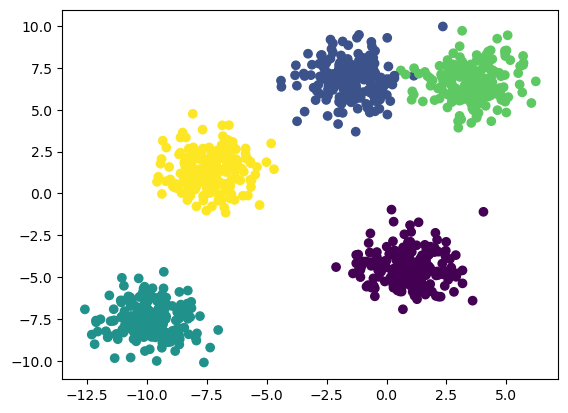

In [80]:
plt.scatter(X[:, 0], X[:, 1], c = Y)


In [81]:
k = 5

color = ['green', 'red', 'blue', 'yellow', 'cyan']

clusters = {}

for i in range(k):
    center = np.random.randint(-12, 10, size = (2))
    point = []
    
    cluster = {
        'center': center,
        'point': point,
        'color': color[i]
    }
    
    clusters[i] = cluster

In [82]:
clusters

{0: {'center': array([  1, -10]), 'point': [], 'color': 'green'},
 1: {'center': array([-11,   5]), 'point': [], 'color': 'red'},
 2: {'center': array([-11,   6]), 'point': [], 'color': 'blue'},
 3: {'center': array([ -3, -12]), 'point': [], 'color': 'yellow'},
 4: {'center': array([-12, -12]), 'point': [], 'color': 'cyan'}}

In [83]:
def distance_formula(p1, p2):
    dist = ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5
    return dist

In [84]:
print(distance_formula(clusters[0]['center'], X[0]))


16.813888816889133


In [85]:
# E-Step
def point_to_cluster(clusters):
    for i in range(X.shape[0]):
        distance = []
        
        for j in range(k):
            dist = distance_formula(X[i], clusters[j]['center'])
            distance.append(dist)
            
        belong_cluster = np.argmin(distance)
        clusters[belong_cluster]['point'].append(X[i])

In [86]:
# M-Step
def update_center_points(clusters):
    for i in range(k):
        p = np.array(clusters[i]['point'])
        
        if p.shape[0]>0:
            u = p.mean(axis = 0)

            clusters[i]['center'] = u
            clusters[i]['point'] = []

In [87]:
def plot_clusters(clusters):
    
    for i in range(k):
        
        p = np.array(clusters[i]['point'])
        
        if p.shape[0]>0:
            plt.scatter(p[:, 0], p[:, 1], c = clusters[i]['color'])
        else:
            pass
        cluster_center = clusters[i]['center']
        plt.scatter(cluster_center[0], cluster_center[1], c = 'black')    

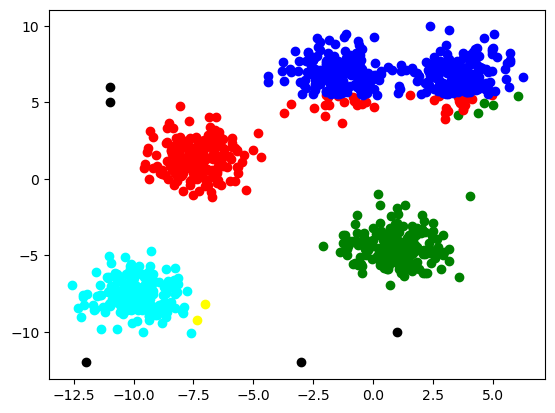

In [88]:
point_to_cluster(clusters)
plot_clusters(clusters)

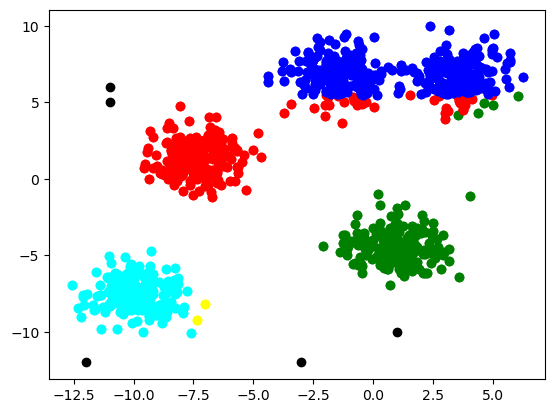

In [89]:
point_to_cluster(clusters)
plot_clusters(clusters)
update_center_points(clusters)

In [93]:
for i in range(100):
    point_to_cluster(clusters)
    update_center_points(clusters)

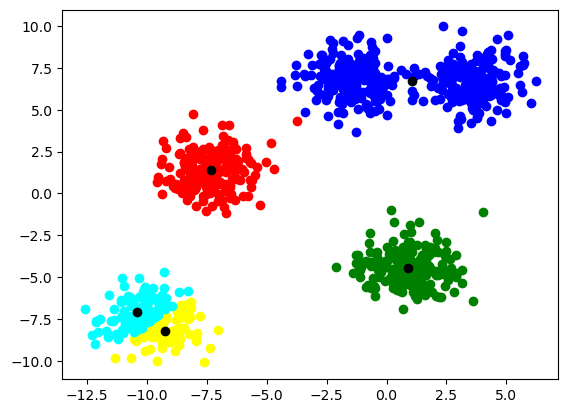

In [94]:
point_to_cluster(clusters)
plot_clusters(clusters)

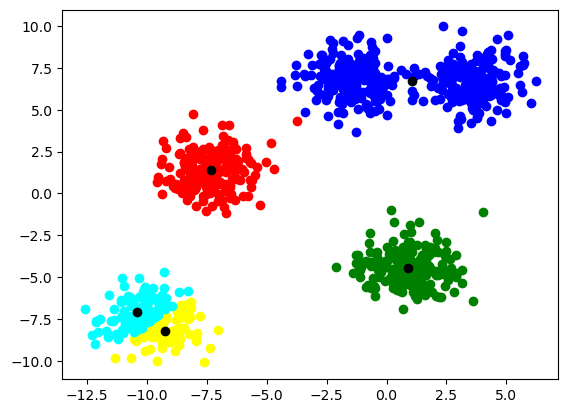

In [95]:
plot_clusters(clusters)